In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from pandasql import sqldf
df = pd.DataFrame({'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'], 'age': [25, 30, 35, 40, 45], 'gender': ['F', 'M', 'M', 'M', 'F']})
query = "SELECT * FROM df WHERE age > 20"
result = sqldf(query)
print(result['name'])

0      Alice
1        Bob
2    Charlie
3      David
4        Eve
Name: name, dtype: object


In [3]:
# 7.Customer Segmentation

# - Statistically Reason
# - Intuitive Reason
# /////////////////////////////////////////////////////////////////////////
# 1. Retirement-> Dependents (3+) -> Average Risk Takers (2.5 to 3.5) wealth manager ki maang 

# 2.5k

# 2. Age (60-70 Old Age)-> Married -> (2-2.5) Risk 

# 3. Married Female -> 0 Dependents

# 4. Age (30-45 Youth) -> High Risk Taker (3-4) 

# 5. Demography (Area) , we can use clustering algo ,area vs asset .


# --------------------------------------------------------

# We are choosing those segments because we want to offer our customers the best solutions that suit their specific needs, preferences, characteristics, and goals. We think that by creating more detailed and meaningful segments, we can better understand our customers, communicate with them, and serve them. Here are some reasons why we chose those segments:

# Segment 1: Retirement Objective -> Dependents (3+) -> Average Risk Takers
# We chose this segment because we want to help customers who have retirement objectives and have to support multiple dependents. We know that these customers have different challenges and opportunities than other customers who have retirement objectives but have fewer or no dependents. We also know that these customers have different risk profiles than other customers who have retirement objectives but are either low or high risk takers. We want to offer these customers solutions that can help them achieve their retirement goals while balancing their risk appetite and their family obligations.
# Segment 2: Age (60-70 Old Age)-> Married -> Low Risk taker
# We chose this segment because we want to help customers who are in the old age group, are married, and are low risk takers. We know that these customers have different needs and preferences than other customers who are in the old age group but are either single or high risk takers. We also know that these customers have different lifestyles and hobbies than other customers who are in the old age group but have different health statuses or interests. We want to offer these customers solutions that can help them enjoy their retirement years while preserving their capital and minimizing their losses.
# Segment 3: Married Female -> 0 Dependents
# We chose this segment because we want to help married females who have no dependents. We know that these customers have different characteristics and motivations than other married females who have dependents or other females who are single or have dependents. We also know that these customers have different education levels, occupations, incomes, and financial goals than other married females who have no dependents or other females who are single or have dependents. We want to offer these customers solutions that can help them achieve their financial goals while empowering them and supporting them.
# Segment 4: Age (30-40 Youth) -> High Risk Taker
# We chose this segment because we want to help young customers who are high risk takers. We know that these customers have different interests and aspirations than other young customers who are low or moderate risk takers or other customers who are older or younger. We also know that these customers have different marital statuses, number of dependents, lifestyles, hobbies, and financial goals than other young customers who are high risk takers or other customers who are older or younger. We want to offer these customers solutions that can help them pursue their dreams while maximizing their returns and taking advantage of the market opportunities.
# Segment 5: Demography (Area) with maximum asset and population with average to high risk tolerance
# We chose this segment because we want to help customers who live in areas with maximum asset and population with average to high risk tolerance. We know that these customers have different behaviors and preferences than other customers who live in areas with less asset and population or with low risk tolerance. We also know that these customers have different ages, incomes, occupations, lifestyles, and financial goals than other customers who live in areas with maximum asset and population with average to high risk tolerance or with low risk tolerance. We want to offer these customers solutions that can help them leverage their wealth and location while diversifying their portfolio and managing their risks.
# ////////////////////////////////////////////////////////////////////////

In [3]:
# Read excel file with 16 sheets
filename = 'data_schema_final.xlsx'
customers = pd.read_excel(io=filename, sheet_name='Customers')
customer_assets = pd.read_excel(io=filename, sheet_name='Customer_Assets')
asset_objectives = pd.read_excel(io=filename, sheet_name='Asset_Objectives')
questions = pd.read_excel(io=filename, sheet_name='Questions')
answers = pd.read_excel(io=filename, sheet_name='Answers')
customer_answers = pd.read_excel(io=filename, sheet_name='Customer_Answers')
risk_profile = pd.read_excel(io=filename, sheet_name='Risk_Profile')
asset_classes = pd.read_excel(io=filename, sheet_name='Asset_Classes')
fee_structures = pd.read_excel(io=filename, sheet_name='Fee_Structures')
potential_funds = pd.read_excel(io=filename, sheet_name='Potential_Funds')
fund_assets = pd.read_excel(io=filename, sheet_name='Fund_Assets')
customer_funds = pd.read_excel(io=filename, sheet_name='Customer_Funds')
fund_targets = pd.read_excel(io=filename, sheet_name='Fund_Targets')
engagement_frequencies = pd.read_excel(io=filename, sheet_name='Engagement_Frequencies')
engagement_types = pd.read_excel(io=filename, sheet_name='Engagement_Types')
customer_engagement_preferences = pd.read_excel(io=filename, sheet_name='Customer_Engagement_Preferences')

In [4]:
customers.columns = customers.columns.str.lower()
customer_assets.columns = customer_assets.columns.str.lower()
customer_answers.columns = customer_answers.columns.str.lower()
answers.columns = answers.columns.str.lower()
risk_profile.columns = risk_profile.columns.str.lower()
# .columns = .columns.str.lower()

In [5]:
# Outlier Analysis on Total Column
customers_final = customers.merge(customer_assets, on="customer_id", how="inner")

883


Text(0.5, 1.0, 'only outliers')

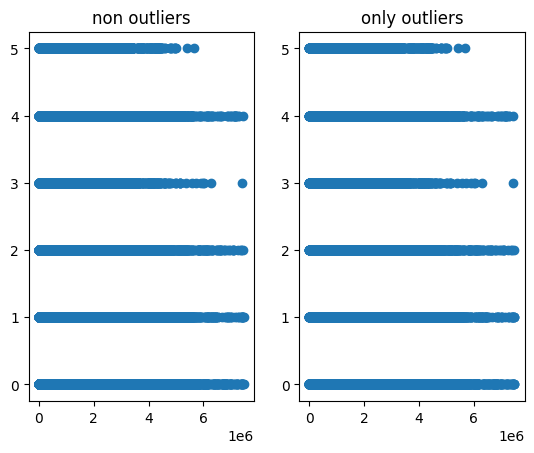

In [6]:
from scipy import stats

z = stats.zscore(customers_final["total"])
cleaned1 = customers_final[np.abs (z) <= 3]
outliers1 =  customers_final[np.abs (z) >= 3]

print(len(outliers1))

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(customers_final["total"], customers_final["number_of_dependents"])
ax1.set_title("non outliers")
ax2.scatter(customers_final["total"], customers_final["number_of_dependents"])
ax2.set_title("only outliers")


Text(0.5, 1.0, 'Cleaned')

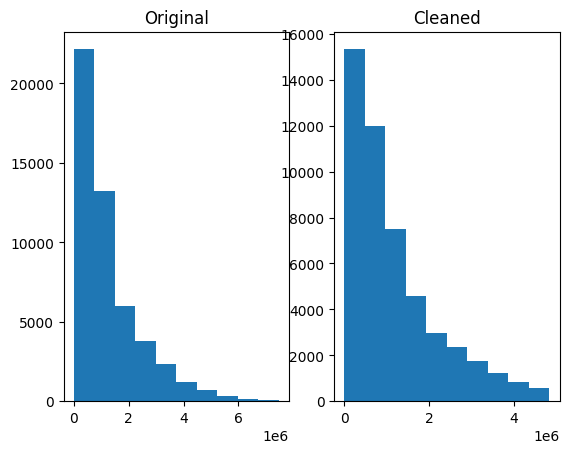

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(customers_final["total"])
# ax1.set_xlim([0, 300])
ax1.set_title("Original")
ax2.hist(cleaned1["total"])
# ax2.set_xlim(0, 300)
ax2.set_title("Cleaned")

In [8]:
cleaned1.head()

,customer_id,contact_last_name,contact_first_name,street,city,state,zip,country,age,marital_status,gender,number_of_dependents,asset_objective_id,total
0,1,Chaney,Jemima,5584 Orci Street,Lexington,Kentucky,36751,United States,65,Married,Male,0,1,1.157902e+05
1,1,Chaney,Jemima,5584 Orci Street,Lexington,Kentucky,36751,United States,65,Married,Male,0,2,7.978310e+05
2,1,Chaney,Jemima,5584 Orci Street,Lexington,Kentucky,36751,United States,65,Married,Male,0,3,8.950859e+05
3,1,Chaney,Jemima,5584 Orci Street,Lexington,Kentucky,36751,United States,65,Married,Male,0,4,1.115145e+06
4,1,Chaney,Jemima,5584 Orci Street,Lexington,Kentucky,36751,United States,65,Married,Male,0,5,7.920459e+05


In [9]:
len(outliers1)

883

In [10]:
outliers1

,customer_id,contact_last_name,contact_first_name,street,city,state,zip,country,age,marital_status,gender,number_of_dependents,asset_objective_id,total
32,7,Johns,Cody,"P.O. Box 982, 4921 Est Road",Lakewood,Colorado,92388,United States,65,Married,Female,0,3,4.976283e+06
53,11,Valencia,Walker,"P.O. Box 253, 9123 Elit. Road",Philadelphia,Pennsylvania,79522,United States,65,Married,Female,0,4,7.218635e+06
98,20,Hendrix,Mariko,3585 Rhoncus Rd.,Harrisburg,Pennsylvania,49282,United States,65,Married,Male,0,4,4.854999e+06
197,40,Perez,Noelle,Ap #799-4300 Ipsum. St.,Columbus,Georgia,19140,United States,65,Married,Female,4,3,5.304698e+06
357,72,Franco,Sybill,"P.O. Box 949, 8765 Natoque St.",Toledo,Ohio,39591,United States,65,Married,Female,1,3,5.181561e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49728,9946,Frye,Sylvester,"P.O. Box 444, 4168 Nunc Road",Baltimore,Maryland,95076,United States,75,Married,Female,1,4,7.410972e+06
49743,9949,Marquez,Brendan,"P.O. Box 512, 6041 Nibh. Avenue",Miami,Florida,73990,United States,75,Married,Female,0,4,6.594929e+06
49753,9951,Mueller,Astra,Ap #918-4856 Dolor. St.,San Francisco,California,96947,United States,75,Married,Female,0,4,5.016431e+06
49898,9980,Watson,Mari,399-7476 Dis Road,Harrisburg,Pennsylvania,59418,United States,75,Married,Female,0,4,6.459665e+06


In [11]:
customers_final1 = cleaned1
rm = outliers1['customer_id']

In [12]:
rm

32          7
53         11
98         20
197        40
357        72
         ... 
49728    9946
49743    9949
49753    9951
49898    9980
49908    9982
Name: customer_id, Length: 883, dtype: int64

In [13]:
customers = customers[~customers['customer_id'].isin(rm)]
customer_assets = customer_assets[~customer_assets['customer_id'].isin(rm)]
customer_answers = customer_answers[~customer_answers['customer_id'].isin(rm)]
# customer_funds = customer_funds[~customer_funds['customer_ID'].isin(rm)]
customer_engagement_preferences = customer_engagement_preferences[~customer_engagement_preferences['Customer_ID'].isin(rm)]

In [14]:
print(len(customers))

9169


In [15]:
x = sqldf(" select count(*) from customers where gender = 'Female' and age >= 40 and age<=60")
x

,count(*)
0,1058


In [16]:
x = sqldf(" select count(*) from customers where gender = 'Female' and age >= 30 and age<=60 and number_of_dependents = 0")
x

,count(*)
0,657


In [17]:
x = sqldf(" select count(*) from customers where age >= 30 and age<=45")
x

,count(*)
0,2599


In [24]:
risk_score_df.head()

,customer_id,risk_score
0,1,2.833333
1,2,4.000000
2,3,3.000000
3,4,2.833333
4,5,2.833333


In [25]:
cust_risk = sqldf("select a.*, b.risk_score from customers a join risk_score_df b on a.customer_id = b.customer_id")
x = sqldf(" select count(*) from cust_risk where age >= 30 and age<=45 and risk_score>=3 and risk_score<=4")
x

,count(*)
0,1392


In [18]:
merged_df=pd.merge(customer_answers,answers,on=['question_id','answer_id'],how='outer')
merged_df.sort_values(by='customer_id',inplace=True)
merged_df.dropna(inplace=True)
avg_score=merged_df.groupby('customer_id')['risk_profile_id'].mean()
score_dict=avg_score.to_dict()
risk_score_df=pd.DataFrame(score_dict.items(), columns=['customer_id', 'risk_score'])
print(risk_score_df)


      customer_id  risk_score
0               1    2.833333
1               2    4.000000
2               3    3.000000
3               4    2.833333
4               5    2.833333
...           ...         ...
9164         9996    3.142857
9165         9997    2.857143
9166         9998    2.833333
9167         9999    2.833333
9168        10000    2.833333

[9169 rows x 2 columns]


In [19]:
wealth_investor_constraint=risk_score_df[risk_score_df['risk_score']>=2]
wealth_investor_constraint=risk_score_df[risk_score_df['risk_score']<=4]
risk_score_counts = wealth_investor_constraint['risk_score'].value_counts()
risk_score_counts

risk_score
3.000000    892
2.833333    725
2.857143    398
3.142857    364
3.285714    341
3.500000    322
4.000000    295
3.125000    278
3.428571    263
3.571429    258
2.500000    257
2.714286    251
3.166667    235
2.571429    230
2.875000    229
3.250000    222
3.857143    199
3.714286    198
3.333333    182
3.375000    176
2.666667    176
2.750000    167
2.428571    156
3.666667    146
3.625000    143
2.625000    136
3.750000    118
2.333333     97
3.833333     97
2.285714     89
3.200000     85
2.375000     78
3.875000     68
2.142857     57
2.000000     53
2.800000     47
2.250000     45
3.600000     43
2.166667     39
2.600000     33
3.400000     33
3.800000     30
2.125000     26
2.400000     25
2.200000     21
1.833333      9
1.857143      5
1.800000      3
1.666667      3
1.875000      2
1.750000      2
1.714286      2
1.500000      2
1.400000      1
1.250000      1
Name: count, dtype: int64

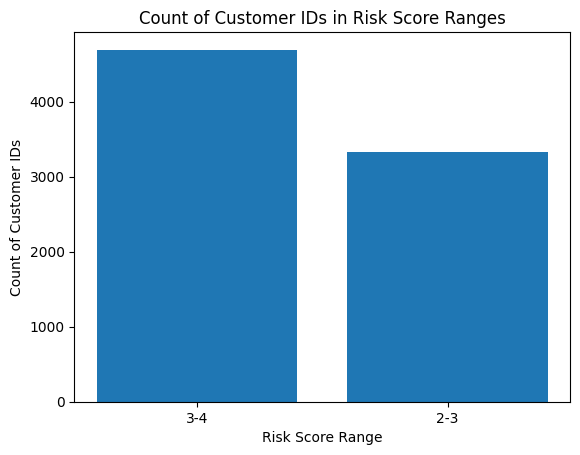

Summary Statistics of Risk Scores:
count    8353.000000
mean        3.086652
std         0.460303
min         1.250000
25%         2.833333
50%         3.000000
75%         3.428571
max         4.000000
Name: risk_score, dtype: float64
Proportion of Customers with Risk Score > 3: 0.49036274392433854


In [20]:
data=wealth_investor_constraint
ranges = [(2, 3), (3, 4)]
labels = ['2-3', '3-4']
data['risk_score_range'] = pd.cut(data['risk_score'], bins=[2, 3, 4], labels=labels, right=False)
risk_score_counts = data['risk_score_range'].value_counts()
plt.bar(risk_score_counts.index, risk_score_counts.values)
plt.xlabel('Risk Score Range')
plt.ylabel('Count of Customer IDs')
plt.title('Count of Customer IDs in Risk Score Ranges')
plt.show()

# Calculate summary statistics of the risk scores
risk_score_summary = data['risk_score'].describe()
print("Summary Statistics of Risk Scores:")
print(risk_score_summary)

# Calculate the proportion of customers with a risk score greater than 3
proportion_above_3 = (data['risk_score'] > 3).mean()
print("Proportion of Customers with Risk Score > 3:", proportion_above_3)

Customer with Max Asset: 7981
 Asset: customer_id
1     3.715898e+06
2     7.230893e+06
3     5.871863e+06
4     1.274188e+07
5     8.836557e+06
6     8.818253e+06
8     8.972242e+06
9     6.891288e+06
10    1.041533e+07
12    6.102186e+06
Name: total, dtype: float64


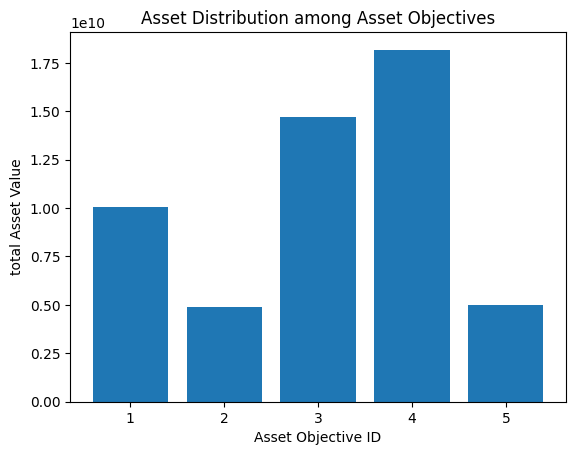

In [21]:
# Analysis of Customer Asset Vs Objectives
max_asset_customer = customer_assets.groupby('customer_id')['total'].sum().idxmax()
print("Customer with Max Asset:", max_asset_customer)
max_asset_customer2 = customer_assets.groupby('customer_id')['total'].sum()
print(" Asset:", max_asset_customer2[:10])
# Asset Distribution among Asset Objectives
asset_distribution = customer_assets.groupby('asset_objective_id')['total'].sum()
# bar chart to visualize the distribution
plt.bar(asset_distribution.index, asset_distribution.values)
plt.xlabel('Asset Objective ID')
plt.ylabel('total Asset Value')
plt.title('Asset Distribution among Asset Objectives')
plt.show()

In [22]:
query = "select asset_objective_id, sum(total)/1e+9 from customer_assets group by asset_objective_id order by sum(total) desc"
result = sqldf(query)
print(result)

   asset_objective_id  sum(total)/1e+9
0                   4        18.176392
1                   3        14.692600
2                   1        10.037561
3                   5         4.990265
4                   2         4.904287


In [26]:
# # asset objective id 4 has max total amount invested
# 4 - retirement
# 3 - family planning
# 1 - general savings
# 5 - unknown
# 2 - home ownership

In [27]:
# AGE 60-70
query = "select a.asset_objective_id, sum(a.total)/1e+9 from customer_assets a join customers c on a.customer_id = c.customer_id where c.age>60 and c.age<70 group by asset_objective_id order by sum(total) desc"
result = sqldf(query)
print(result)

   asset_objective_id  sum(a.total)/1e+9
0                   4           5.300534
1                   3           4.312928
2                   1           3.016256
3                   2           1.485661
4                   5           1.485374


In [28]:
# AGE 30-40
query = "select a.asset_objective_id, sum(a.total)/1e+9 from customer_assets a join customers c on a.customer_id = c.customer_id where c.age>30 and c.age<40 group by asset_objective_id order by sum(total) desc"
result = sqldf(query)
print(result)

   asset_objective_id  sum(a.total)/1e+9
0                   4           2.470131
1                   3           1.954093
2                   1           1.278295
3                   5           0.650582
4                   2           0.637314


In [29]:
# age and total for asset_objective_id = 4
query = "select c.customer_id, c.age, a.total from customer_assets a join customers c on a.customer_id = c.customer_id where a.asset_objective_id = 4 order by c.age"
result = sqldf(query)
print(result)

      customer_id  age         total
0             841   33  1.089264e+04
1             842   33  1.770937e+06
2             843   33  1.475547e+05
3             844   33  2.242903e+06
4             845   33  1.484654e+06
...           ...  ...           ...
9164         9996   75  7.187422e+05
9165         9997   75  3.325183e+06
9166         9998   75  5.310614e+05
9167         9999   75  2.940355e+06
9168        10000   75  1.393821e+06

[9169 rows x 3 columns]


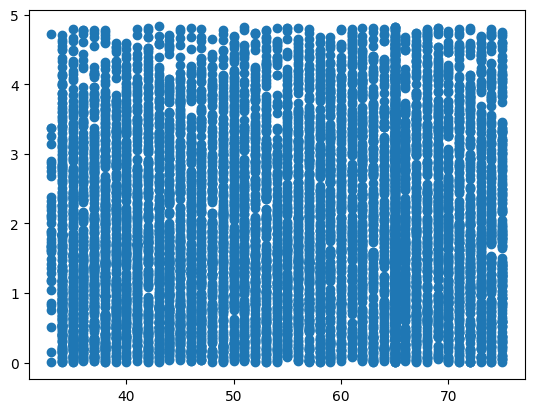

In [30]:
plt.scatter(result['age'], result['total'] / 1e+06)

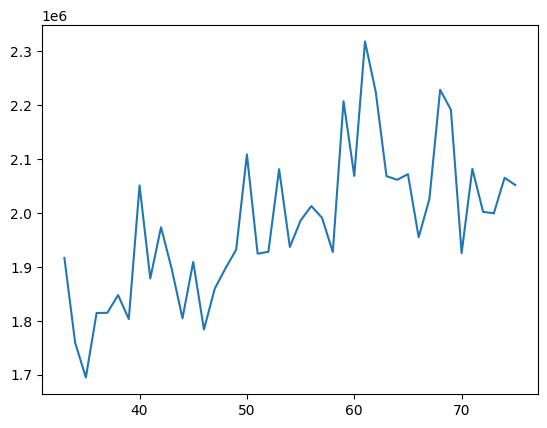

In [31]:
arr1 = result.groupby('age')['total'].mean()
# print(arr1)
plt.plot(arr1)

In [32]:
# Segment 1
# RETIREMENT ASSET OBJECTIVE

In [33]:
# create or replace view DA1 as (Select customer_id, Number_Of_Dependents from customers);

# create or replace view DA2 as (Select distinct customer_id, total from Customer_Assets where asset_objective_id=3);

# create or replace view DA3 as
# Select A.customer_id, A.Number_Of_Dependents, B.total from DA1 A
# join DA2 B
# on A.customer_id=B.customer_id
# where number_of_dependents = 1;

# select count(*) from DA3;

In [34]:
# total_asset vs no of dependents for ASSET ID 4

DA1 = customers[["customer_id", "number_of_dependents"]]
DA2 = customer_assets[customer_assets["asset_objective_id"] == 4]

# Create view DA3 by joining DA1 and DA2 on customer_id and filtering by number_of_dependents = 1
DA3 = DA1.merge(DA2, on="customer_id", how="inner")

df0 = DA3[DA3["number_of_dependents"] == 0]
df1 = DA3[DA3["number_of_dependents"] == 1]
df2 = DA3[DA3["number_of_dependents"] == 2]
df3 = DA3[DA3["number_of_dependents"] == 3]
df4 = DA3[DA3["number_of_dependents"] == 4]
df5 = DA3[DA3["number_of_dependents"] == 5]

print("0 dependents - ", len(df0), " - ", sum(df0['total']))
print("1 dependents - ", len(df1), " - ", sum(df1['total']))
print("2 dependents - ", len(df2), " - ", sum(df2['total']))
print("3 dependents - ", len(df3), " - ", sum(df3['total']))
print("4 dependents - ", len(df4), " - ", sum(df4['total']))
print("5 dependents - ", len(df5), " - ", sum(df5['total']))

0 dependents -  3283  -  6560175754.444022
1 dependents -  1845  -  3709205676.8631997
2 dependents -  1496  -  2957301902.029594
3 dependents -  845  -  1582136216.9368002
4 dependents -  1066  -  2149423900.6151996
5 dependents -  634  -  1218148279.9080012


In [35]:
len(DA3)

9169

In [36]:
# choosing 3-4 dependents for number_of_dependents as they are max total groups
d1 = pd.concat([df3,df4], ignore_index=True, sort=False)
df_final = pd.concat([d1, df5], ignore_index=True, sort=False)

len(df_final['customer_id'].unique())


2545

In [37]:
r1 = sqldf("select a.*, b.risk_score from df_final a join risk_score_df b on a.customer_id = b.customer_id order by a.customer_id")
r1.head()

,customer_id,number_of_dependents,asset_objective_id,total,risk_score
0,21,5,4,4.808139e+06,2.857143
1,22,5,4,3.371163e+06,2.285714
2,23,5,4,2.054530e+06,3.500000
3,24,5,4,4.580688e+05,2.857143
4,25,5,4,9.725652e+05,3.142857


In [38]:
r2 = sqldf("select * from r1 where risk_score>=2 and risk_score<=3")
r3 = sqldf("select * from r1 where risk_score>=2.5 and risk_score<=3.5")

print(len(r2))
print(len(r3))

1089
1630


In [39]:
print(r1['risk_score'].mean())
print(r2['risk_score'].mean())
print(r3['risk_score'].mean())

3.2206618954064927
2.72177183086274
3.0168543675138766


In [40]:
# asset_objective_id = 4, no_of_dependents = +3
# r1 (all, 2.5k) -> 3.22
# r2 (risk between 2 to 3, 1k) -> 2.7
# r3 (risk between 2.5 to 3.5) -> 3

In [41]:
# Choosing -> asset_objective_id = 4, no_of_dependents = +3, risk between 2.5 to 3.5 
# population 1630

In [42]:
# SEGMENT 2
# AGE 60 - 70

In [43]:
# AGE 60-70
query = "select c.*, a.asset_objective_id, a.total from customer_assets a join customers c on a.customer_id = c.customer_id where c.age>60 and c.age<70"
result = sqldf(query)
print(result.head())

print()
print(len(result['customer_id'].unique()))

   customer_id contact_last_name contact_first_name            street  \
0            1            Chaney             Jemima  5584 Orci Street   
1            1            Chaney             Jemima  5584 Orci Street   
2            1            Chaney             Jemima  5584 Orci Street   
3            1            Chaney             Jemima  5584 Orci Street   
4            1            Chaney             Jemima  5584 Orci Street   

        city     state    zip        country  age marital_status gender  \
0  Lexington  Kentucky  36751  United States   65        Married   Male   
1  Lexington  Kentucky  36751  United States   65        Married   Male   
2  Lexington  Kentucky  36751  United States   65        Married   Male   
3  Lexington  Kentucky  36751  United States   65        Married   Male   
4  Lexington  Kentucky  36751  United States   65        Married   Male   

   number_of_dependents  asset_objective_id         total  
0                     0                   1  1.157

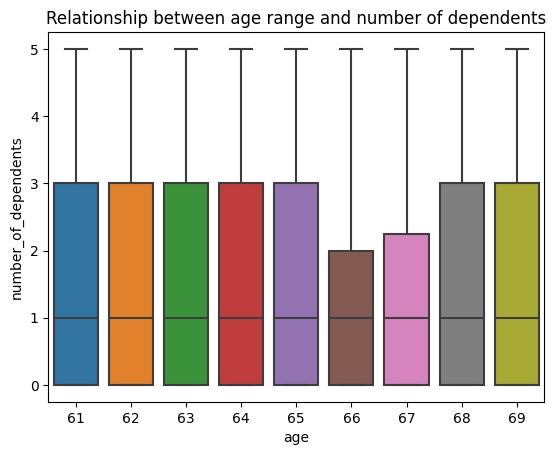

In [44]:
df = result
sns.boxplot(data=df, x='age', y='number_of_dependents')
plt.title('Relationship between age range and number of dependents')
plt.show()

<Axes: xlabel='gender', ylabel='count'>

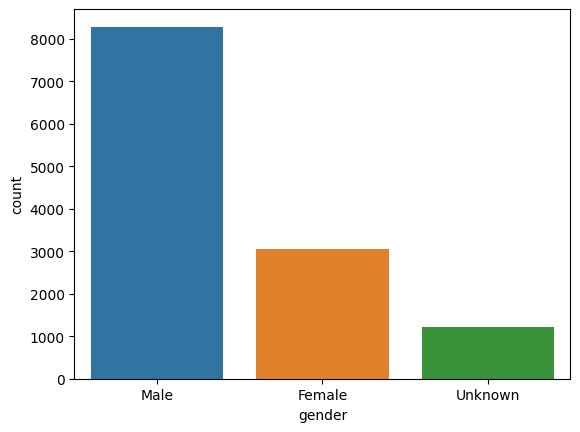

In [45]:
sns.countplot(data=df, x='gender')

<Axes: xlabel='marital_status', ylabel='count'>

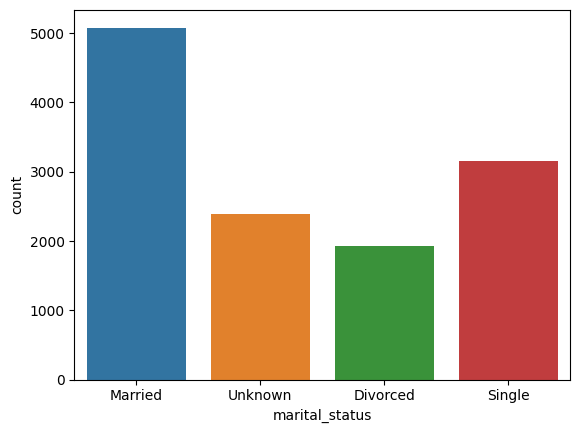

In [46]:
sns.countplot(data=df, x='marital_status')

<Axes: xlabel='gender', ylabel='count'>

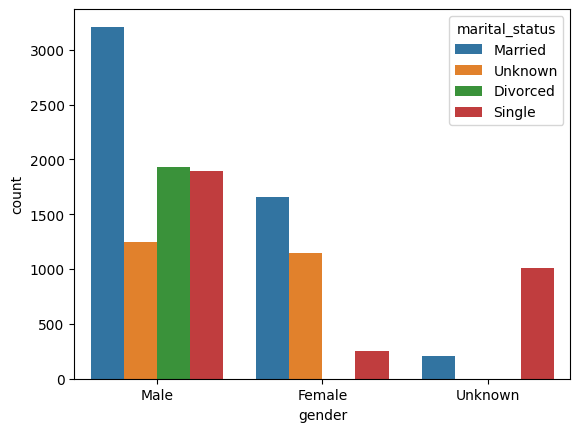

In [47]:
sns.countplot(data=df, x='gender', hue='marital_status')

<Axes: xlabel='number_of_dependents', ylabel='count'>

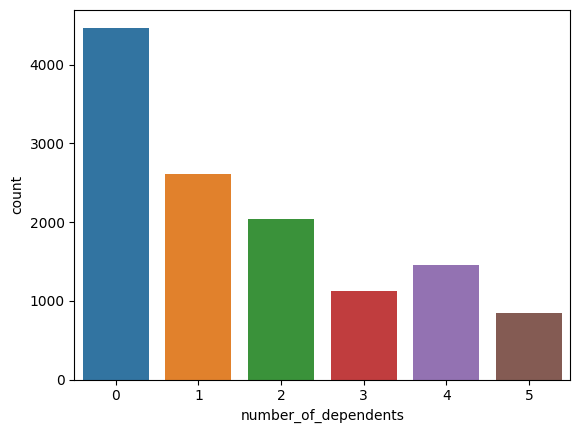

In [48]:
sns.countplot(data=df, x='number_of_dependents')

<Axes: xlabel='asset_objective_id', ylabel='count'>

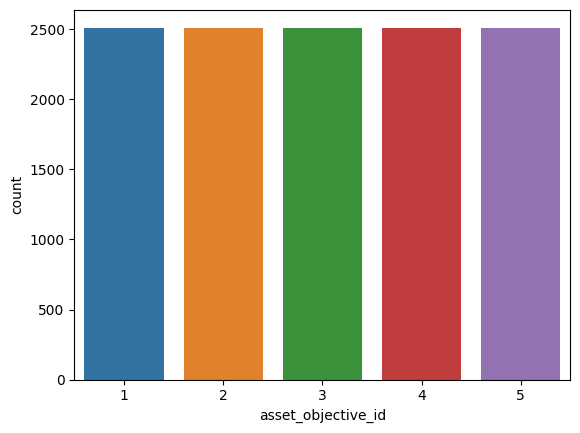

In [49]:
sns.countplot(data=df, x='asset_objective_id')

<Axes: xlabel='number_of_dependents', ylabel='total'>

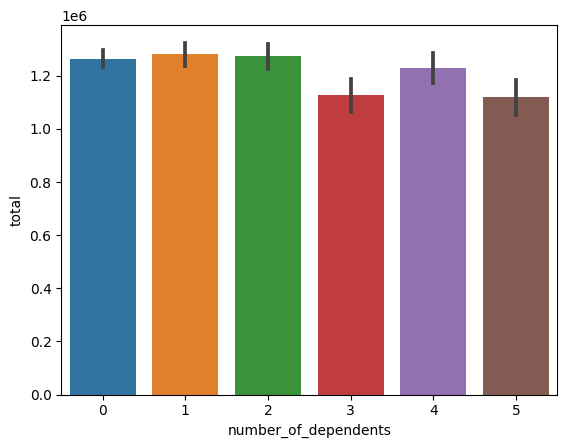

In [50]:
sns.barplot(x='number_of_dependents', y='total', data=df)

In [51]:
q1 = sqldf("select marital_status, sum(total) from result group by  marital_status order by sum(total) desc")
print(q1)


  marital_status    sum(total)
0        Married  7.555823e+09
1         Single  3.696668e+09
2        Unknown  3.256640e+09
3       Divorced  1.091621e+09


In [52]:
q4 = sqldf("select number_of_dependents, marital_status, gender, count(*), sum(total) from df group by number_of_dependents, marital_status, gender order by sum(total) desc")
print(q4)


    number_of_dependents marital_status   gender  count(*)    sum(total)
0                      0        Married     Male      1010  1.341077e+09
1                      0        Married   Female       710  1.216581e+09
2                      1        Married     Male       775  1.040916e+09
3                      0        Unknown   Female       500  8.150370e+08
4                      0         Single     Male       715  7.615289e+08
5                      2        Married     Male       480  6.569780e+08
6                      1        Married   Female       380  6.565291e+08
7                      2        Married   Female       325  5.991922e+08
8                      0        Unknown     Male       445  5.005580e+08
9                      3        Married     Male       355  4.671831e+08
10                     4        Married     Male       335  4.656518e+08
11                     1        Unknown   Female       275  4.485219e+08
12                     0         Single  Unknown   

In [53]:
# Choosing: married people in age 60-70

In [54]:
len(result)

12560

In [55]:
m = sqldf("select c.*, a.asset_objective_id, a.total from customer_assets a join customers c on a.customer_id = c.customer_id where c.age>60 and c.age<70 and marital_status == 'Married'")
# m.head()

In [56]:
query = "select a.*, b.risk_score from m a join risk_score_df b on a.customer_id = b.customer_id order by a.customer_id"
r1 = sqldf(query)
# print(r1.head(2))
print("/n")
print(r1['customer_id'].unique())
print(r1['risk_score'].mean())

/n
[   1    2    4 ... 8680 8682 8683]
2.8037495313085863


In [57]:
print(len(r1['customer_id'].unique()))

1016


In [58]:
# marrried aged 60-70
m1 = sqldf("select c.*, a.asset_objective_id, a.total from customer_assets a join customers c on a.customer_id = c.customer_id where c.age>60 and c.age<70 and marital_status == 'Married'")
# join with risk_score_df
m2 = sqldf("select a.*, b.risk_score from m1 a join risk_score_df b on a.customer_id = b.customer_id order by a.customer_id")
m3 = sqldf("select distinct customer_id, risk_score from m2")
print(m3)

      customer_id  risk_score
0               1    2.833333
1               2    4.000000
2               4    2.833333
3               5    2.833333
4               6    2.833333
...           ...         ...
1011         8677    3.500000
1012         8678    2.428571
1013         8680    2.500000
1014         8682    2.833333
1015         8683    2.428571

[1016 rows x 2 columns]


In [59]:
m4 = sqldf("select count(*), avg(risk_score) from m3 where risk_score>=2 and risk_score<=2.5")
m4

,count(*),avg(risk_score)
0,186,2.373784


In [60]:
m4 = sqldf("select count(*), avg(risk_score) from m3 where risk_score>=2 and risk_score<=3.5")
m4

,count(*),avg(risk_score)
0,994,2.798147


In [61]:
print(len(m3))

1016


In [62]:
print(m3['risk_score'].mean())

2.8037495313085863


In [63]:
# married aged 60- 70
# population 1016

In [64]:
# SEGMENT 3 

In [65]:
query = "select c.*, a.asset_objective_id, a.total from customer_assets a join customers c on a.customer_id = c.customer_id order by c.customer_id" 
ms = sqldf(query)
print(ms.head())


print()
print(len(ms['customer_id'].unique()))

   customer_id contact_last_name contact_first_name            street  \
0            1            Chaney             Jemima  5584 Orci Street   
1            1            Chaney             Jemima  5584 Orci Street   
2            1            Chaney             Jemima  5584 Orci Street   
3            1            Chaney             Jemima  5584 Orci Street   
4            1            Chaney             Jemima  5584 Orci Street   

        city     state    zip        country  age marital_status gender  \
0  Lexington  Kentucky  36751  United States   65        Married   Male   
1  Lexington  Kentucky  36751  United States   65        Married   Male   
2  Lexington  Kentucky  36751  United States   65        Married   Male   
3  Lexington  Kentucky  36751  United States   65        Married   Male   
4  Lexington  Kentucky  36751  United States   65        Married   Male   

   number_of_dependents  asset_objective_id         total  
0                     0                   1  1.157

In [66]:
ms1 = sqldf("select customer_id, sum(total) as t, number_of_dependents, marital_status, age, gender from ms group by customer_id")
ms1

,customer_id,t,number_of_dependents,marital_status,age,gender
0,1,3.715898e+06,0,Married,65,Male
1,2,7.230893e+06,0,Married,65,Male
2,3,5.871863e+06,0,Unknown,65,Male
3,4,1.274188e+07,0,Married,65,Female
4,5,8.836557e+06,0,Married,65,Female
...,...,...,...,...,...,...
9164,9996,7.234247e+06,0,Married,75,Male
9165,9997,9.216708e+06,0,Single,75,Unknown
9166,9998,5.511694e+06,0,Married,75,Unknown
9167,9999,7.213900e+06,0,Single,75,Unknown


In [67]:
r1 = sqldf("select number_of_dependents, gender, marital_status, count(*), sum(t) from ms1 group by number_of_dependents, gender, marital_status order by count(*) desc, sum(t) desc")
r1

,number_of_dependents,gender,marital_status,count(*),sum(t)
0,0,Male,Married,737,4.583712e+09
1,0,Female,Married,556,4.511808e+09
2,0,Male,Divorced,491,1.277927e+09
3,0,Male,Single,482,2.303502e+09
4,1,Male,Married,472,2.942313e+09
5,2,Male,Married,371,2.263526e+09
6,0,Female,Unknown,369,2.734343e+09
7,0,Male,Unknown,299,1.519194e+09
8,3,Male,Married,270,1.694806e+09
9,1,Female,Married,269,2.193632e+09


In [68]:
print(sum(r1['count(*)']))

9169


In [69]:
r2 = sqldf("select gender, marital_status, count(*), sum(t) from ms1 group by  gender, marital_status order by sum(t) desc, count(*) desc")
r2

,gender,marital_status,count(*),sum(t)
0,Male,Married,2244,1.400630e+10
1,Female,Married,1237,1.013272e+10
2,Female,Unknown,869,6.490946e+09
3,Male,Single,1346,6.417759e+09
4,Male,Unknown,869,4.477468e+09
5,Unknown,Single,730,4.305653e+09
6,Male,Divorced,1429,3.761375e+09
7,Unknown,Married,227,1.702580e+09
8,Female,Single,218,1.506308e+09


In [70]:
r2 = sqldf("select number_of_dependents, gender, count(*), sum(t) from ms1 group by  number_of_dependents,gender order by sum(t) desc, count(*) desc")
r2

,number_of_dependents,gender,count(*),sum(t)
0,0,Male,2009,9.684334e+09
1,0,Female,1032,7.988532e+09
2,1,Male,1153,5.771185e+09
3,2,Male,959,4.618972e+09
4,1,Female,532,4.176957e+09
5,3,Male,670,3.264556e+09
6,4,Male,646,3.144998e+09
7,2,Female,390,3.098684e+09
8,4,Female,350,2.711035e+09
9,5,Male,451,2.178851e+09


In [71]:
r2 = sqldf("select number_of_dependents, marital_status, count(*), sum(t) from ms1 group by  number_of_dependents,marital_status order by sum(t) desc, count(*) desc")
r2

,number_of_dependents,marital_status,count(*),sum(t)
0,0,Married,1338,9.413957e+09
1,1,Married,772,5.380809e+09
2,2,Married,633,4.434025e+09
3,0,Unknown,668,4.253537e+09
4,0,Single,786,4.240955e+09
5,4,Married,433,3.103008e+09
6,1,Unknown,402,2.628799e+09
7,1,Single,429,2.264441e+09
8,3,Married,326,2.145301e+09
9,2,Unknown,288,1.816589e+09


In [72]:
r3 = sqldf("select number_of_dependents, marital_status, count(*), sum(t) from ms1 group by  number_of_dependents,marital_status order by sum(t) desc, count(*) desc")
r3

,number_of_dependents,marital_status,count(*),sum(t)
0,0,Married,1338,9.413957e+09
1,1,Married,772,5.380809e+09
2,2,Married,633,4.434025e+09
3,0,Unknown,668,4.253537e+09
4,0,Single,786,4.240955e+09
5,4,Married,433,3.103008e+09
6,1,Unknown,402,2.628799e+09
7,1,Single,429,2.264441e+09
8,3,Married,326,2.145301e+09
9,2,Unknown,288,1.816589e+09


In [73]:
r8 = sqldf("select number_of_dependents, gender, count(*)as count, sum(t) as total from ms1 where number_of_dependents <2 group by number_of_dependents, gender order by sum(t) desc, count(*) desc")
r8

,number_of_dependents,gender,count,total
0,0,Male,2009,9.684334e+09
1,0,Female,1032,7.988532e+09
2,1,Male,1153,5.771185e+09
3,1,Female,532,4.176957e+09
4,0,Unknown,242,1.513510e+09
5,1,Unknown,160,9.561455e+08


In [74]:
r8 = sqldf("select number_of_dependents, gender, count(*)as count, sum(t) as total from ms1 where gender = 'Female' group by number_of_dependents, gender order by sum(t) desc, count(*) desc")
r8

,number_of_dependents,gender,count,total
0,0,Female,1032,7.988532e+09
1,1,Female,532,4.176957e+09
2,2,Female,390,3.098684e+09
3,4,Female,350,2.711035e+09
4,3,Female,20,1.547655e+08


In [75]:
# Female 0,1 dependents 

In [76]:
query = "select a.*, b.risk_score from ms1 a join risk_score_df b on a.customer_id = b.customer_id where gender = 'Female' and (number_of_dependents = 0 or number_of_dependents = 1) order by a.customer_id"
r1 = sqldf(query)
print(r1.head())



   customer_id             t  number_of_dependents marital_status  age  \
0            4  1.274188e+07                     0        Married   65   
1            5  8.836557e+06                     0        Married   65   
2            6  8.818253e+06                     0        Married   65   
3            8  8.972242e+06                     0        Married   65   
4            9  6.891288e+06                     0        Married   65   

   gender  risk_score  
0  Female    2.833333  
1  Female    2.833333  
2  Female    2.833333  
3  Female    2.833333  
4  Female    2.833333  


In [77]:
print(len(r1['customer_id'].unique()))
r1['risk_score'].mean()

1564


2.965166392644014

In [78]:
q = sqldf("select count(*) from customers where gender = 'Female' and ((number_of_dependents = 0) or (number_of_dependents=1)) ")
q

,count(*)
0,1564


In [79]:
# Segment 4
# AGE GROUP 30-40 (YOUTH)
# RISK TOLERANCE WAS MORE

In [80]:
query = "select a.*, b.risk_score from customers a join risk_score_df b on a.customer_id = b.customer_id where a.age>=30 and a.age<=40"
r3 = sqldf(query)
print(r3.head(2))

   customer_id contact_last_name contact_first_name  \
0          841               Roy             Tucker   
1          842           Simpson               Oren   

                            street          city     state    zip  \
0  P.O. Box 843, 8127 Augue Avenue    Birmingham   Alabama  36565   
1             723-2566 Aliquet St.  Grand Rapids  Michigan  81003   

         country  age marital_status gender  number_of_dependents  risk_score  
0  United States   33       Divorced   Male                     1    4.142857  
1  United States   33         Single   Male                     1    4.142857  


In [81]:
print(len(r3['customer_id'].unique()))

1565


In [82]:
r3['risk_score'].mean()

3.4699353415487604

In [83]:
max(wealth_investor_constraint['risk_score'])

4.0

In [84]:
m1 = wealth_investor_constraint[wealth_investor_constraint['risk_score'] == 4] 
qr1 = sqldf("select a.age from customers a join m1 b on a.customer_id = b.customer_id order by a.age")
len(qr1)

qr1

,age
0,34
1,35
2,35
3,35
4,35
...,...
290,72
291,73
292,75
293,75


In [85]:
p1 = sqldf("select avg(b.risk_score) from customers a join risk_score_df b on a.customer_id = b.customer_id where a.age>=30 and a.age<=40")
print(p1)

   avg(b.risk_score)
0           3.469935


In [86]:
p2 = sqldf("select avg(b.risk_score) from customers a join risk_score_df b on a.customer_id = b.customer_id where a.age>=40 and a.age<=50")
print(p2)

   avg(b.risk_score)
0           3.224387


In [87]:
p3 = sqldf("select avg(b.risk_score) from customers a join risk_score_df b on a.customer_id = b.customer_id where a.age>=50 and a.age<=60")
print(p3)

   avg(b.risk_score)
0           3.249038


In [88]:
p4 = sqldf("select avg(b.risk_score) from customers a join risk_score_df b on a.customer_id = b.customer_id where a.age>=60 and a.age<=70")
print(p4)

   avg(b.risk_score)
0           3.040239


In [89]:
df_34 = r3

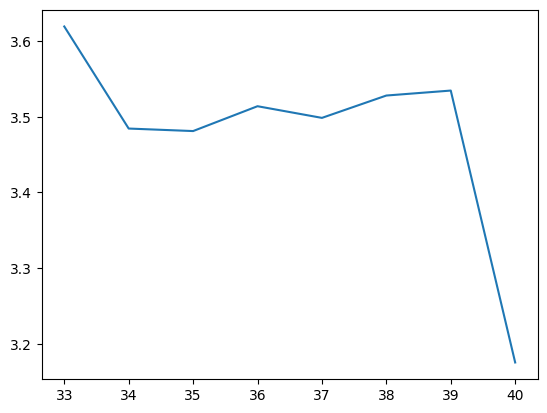

In [90]:
arr1 = r3.groupby('age')['risk_score'].mean()
plt.plot(arr1)

In [91]:
print(len(r3['customer_id'].unique()))

1565


In [92]:
qq = sqldf("select a.*, b.asset_objective_id, b.total from r3 a join customer_assets b on a.customer_id = b.customer_id")
print(qq.head())

   customer_id contact_last_name contact_first_name  \
0          841               Roy             Tucker   
1          841               Roy             Tucker   
2          841               Roy             Tucker   
3          841               Roy             Tucker   
4          841               Roy             Tucker   

                            street        city    state    zip        country  \
0  P.O. Box 843, 8127 Augue Avenue  Birmingham  Alabama  36565  United States   
1  P.O. Box 843, 8127 Augue Avenue  Birmingham  Alabama  36565  United States   
2  P.O. Box 843, 8127 Augue Avenue  Birmingham  Alabama  36565  United States   
3  P.O. Box 843, 8127 Augue Avenue  Birmingham  Alabama  36565  United States   
4  P.O. Box 843, 8127 Augue Avenue  Birmingham  Alabama  36565  United States   

   age marital_status gender  number_of_dependents  risk_score  \
0   33       Divorced   Male                     1    4.142857   
1   33       Divorced   Male                     1

In [93]:
qs = sqldf("select distinct(customer_id), risk_score from qq")
qs

,customer_id,risk_score
0,841,4.142857
1,842,4.142857
2,843,2.625000
3,844,3.500000
4,845,3.500000
...,...,...
1560,2454,3.250000
1561,2455,4.000000
1562,2456,2.875000
1563,2457,3.250000


In [94]:
qr = sqldf("select count(*), avg(risk_score) from qs where risk_score>=3")
qr

,count(*),avg(risk_score)
0,1265,3.664704


In [95]:
qr = sqldf("select count(*), avg(risk_score) from qs where risk_score>=3.5")
qr

,count(*),avg(risk_score)
0,739,4.018329


In [96]:
qr = sqldf("select count(*), avg(risk_score) from qs where risk_score>=3.14")
qr

,count(*),avg(risk_score)
0,1009,3.81997


In [97]:
# SEGMENT 5
# GEOGRAPHICALLY

In [98]:
query = "select a.*, b.risk_score from customers a join risk_score_df b on a.customer_id = b.customer_id"
r4 = sqldf(query)
len(r4)

9169

In [99]:
r5 = sqldf("select a.*, b.asset_objective_id, b.total from r4 a join customer_assets b on a.customer_id = b.customer_id")
r6 = sqldf("select customer_id, state, risk_score, sum(total) as t from r5 group by customer_id")
r6

,customer_id,state,risk_score,t
0,1,Kentucky,2.833333,3.715898e+06
1,2,Massachusetts,4.000000,7.230893e+06
2,3,Wisconsin,3.000000,5.871863e+06
3,4,Oregon,2.833333,1.274188e+07
4,5,Washington,2.833333,8.836557e+06
...,...,...,...,...
9164,9996,Ohio,3.142857,7.234247e+06
9165,9997,Delaware,2.857143,9.216708e+06
9166,9998,Massachusetts,2.833333,5.511694e+06
9167,9999,Oregon,2.833333,7.213900e+06


<Axes: xlabel='state', ylabel='count'>

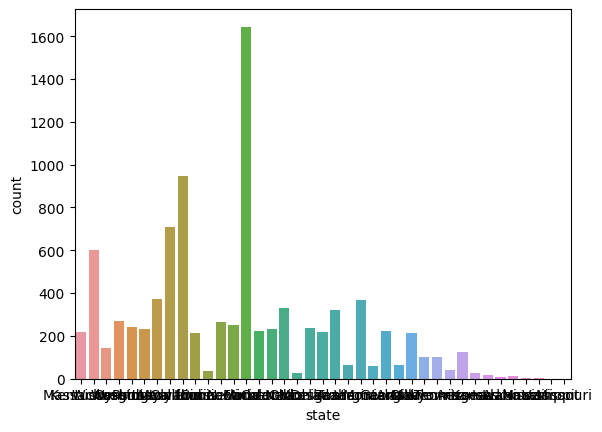

In [100]:
sns.countplot(data = r4, x = 'state')

In [101]:
q8 = sqldf("select distinct state, count(*) from r4 group by state order by count(*) desc")
q8

,state,count(*)
0,Florida,1644
1,California,945
2,Maryland,707
3,Massachusetts,602
4,Pennsylvania,374
5,Virginia,369
6,Ohio,328
7,Texas,323
8,Oregon,269
9,Connecticut,263


In [102]:
q = sqldf("select state, count(*), sum(t), avg(risk_score) from r6 group by state order by sum(t) desc, count(*) desc, avg(risk_score) desc")
q

,state,count(*),sum(t),avg(risk_score)
0,Florida,1644,9.612992e+09,3.176795
1,California,945,5.457211e+09,3.187536
2,Maryland,707,4.136773e+09,3.153725
3,Massachusetts,602,3.527334e+09,3.211256
4,Pennsylvania,374,2.180408e+09,3.197002
5,Virginia,369,2.114118e+09,3.202155
6,Ohio,328,1.878037e+09,3.137605
7,Texas,323,1.855313e+09,3.239971
8,Oregon,269,1.541387e+09,3.211599
9,Connecticut,263,1.494306e+09,3.120636


In [103]:
q = sqldf("select count(*), avg(risk_score) from r6 where state = 'Florida'")
q

,count(*),avg(risk_score)
0,1644,3.176795


In [104]:
# Female -- segment

# asset allocation group by age in women with objective of retirement
# like 35 to 40 me women ka retirement obj me kitta asset allocation, 40 to 45 me 45 to 45 etc